In [1]:
import snap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Classical analysis to quantitatively describe the social networks, built using specific relationships.

Metrics to be considered for each network:
- #nodes, #edges
- average degree, indegree, outdegree
- node centrality (?, intensive)
- <b> modularity </b> (average and between finance community and the rest, to verify if it is effectively a module)
- clustering coefficient
- isConnected, connected components

NB: default script to be used as basic metrics analysis of any network

In [2]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height), rotation=45,
                ha='center', va='bottom')

## Following Network

In [3]:
path = 'random-test/test-network-features/'
networkname = 'social_network_1_following'
network = snap.LoadEdgeListNet(path+networkname+'.csv', '\t')

In [4]:
print '|V| = {}'.format(network.GetNodes())
print '|E| = {}'.format(network.GetEdges())
print 'Connected Network: {}'.format(snap.IsConnected(network))

|V| = 71039
|E| = 87161
Connected Network: False


In [5]:
# a WEAKLY connected component is a subgraph where each node is reachable by an UNDIRECTED PATH, starting from each other
# node in the component (undirected cycle present)
# the property is verified treating the graph as undirected (even if it is directed)
ComponentDist = snap.TIntPrV()
snap.GetWccSzCnt(network, ComponentDist)
print "Weakly Connected Component Distribution"
for comp in ComponentDist:
    print "#nodes in component: %d - #components: %d" % (comp.GetVal1(), comp.GetVal2())

Weakly Connected Component Distribution
#nodes in component: 2 - #components: 7
#nodes in component: 4 - #components: 2
#nodes in component: 5 - #components: 2
#nodes in component: 7 - #components: 1
#nodes in component: 12 - #components: 1
#nodes in component: 23 - #components: 1
#nodes in component: 25 - #components: 1
#nodes in component: 27 - #components: 1
#nodes in component: 51 - #components: 1
#nodes in component: 70862 - #components: 1


In [6]:
# a STRONGLY connected component is a subgraph where each node is reachable by a DIRECTED PATH, starting from each other
# node in the component (directed cycle present)
ComponentDist = snap.TIntPrV()
snap.GetSccSzCnt(network, ComponentDist)
print "Strongly Connected Component Distribution"
for comp in ComponentDist:
    print "#nodes in component: %d - #components: %d" % (comp.GetVal1(), comp.GetVal2())

Strongly Connected Component Distribution
#nodes in component: 1 - #components: 71005
#nodes in component: 2 - #components: 2
#nodes in component: 30 - #components: 1


In [7]:
indeg = []
count = []
indeg_distribution = snap.TIntPrV()
snap.GetInDegCnt(network, indeg_distribution)
for item in indeg_distribution:
    indeg.append(item.GetVal1())
    count.append(item.GetVal2())

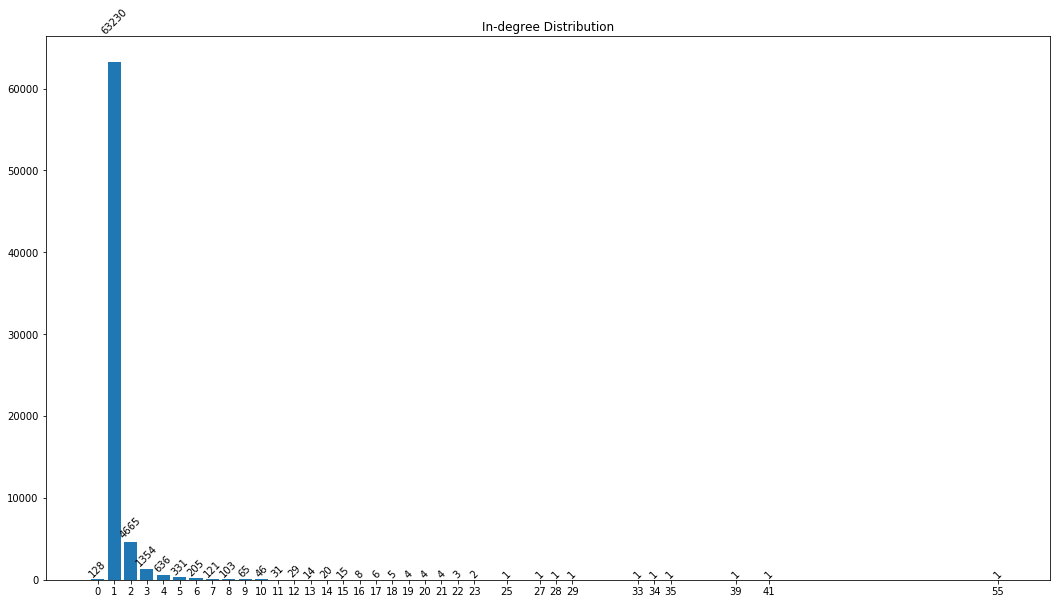

In [8]:
# indegree represents the number of incoming following relationships for each node: most of them have 1 as in-degree, 
# meaning that they are the following of 1 single user (leaves), other are shared across multiple users
# 0 in-degree are some of the target users from which we started the collection (the seeds and the random users), that 
# do not appear in any following list

plt.figure(figsize=(18,10))
bars = plt.bar(indeg, count)
plt.title('In-degree Distribution')
plt.xticks(indeg)
autolabel(bars)

In [9]:
indeg = []
indeg_distribution = snap.TIntPrV()
snap.GetNodeInDegV(network, indeg_distribution)
for item in indeg_distribution:
    indeg.append(item.GetVal2())

In [10]:
print 'Average In-degree distribution: {}'.format(np.mean(indeg))

Average In-degree distribution: 1.22694576219


In [11]:
# outdegree represents the dimension on following list for each user
# outdegree == 0 are the leaves users, for which we do not have a following list
# outdegree is extremely variated, as most users have a different number of followings
outdeg = []
count = []
outdeg_distribution = snap.TIntPrV()
snap.GetOutDegCnt(network, outdeg_distribution)
for item in outdeg_distribution:
    outdeg.append(item.GetVal1())
    count.append(item.GetVal2())

In [12]:
print 'Out-degrees: {}'.format(outdeg)
print 'Frequency {}'.format(count)

Out-degrees: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 31, 33, 34, 35, 36, 37, 41, 43, 50, 54, 63, 65, 70, 71, 74, 80, 81, 83, 85, 93, 96, 99, 101, 103, 108, 117, 120, 131, 136, 141, 147, 149, 150, 153, 157, 159, 160, 169, 173, 179, 184, 186, 191, 200, 206, 209, 210, 219, 222, 233, 238, 244, 249, 251, 274, 286, 288, 319, 325, 343, 345, 351, 372, 379, 400, 407, 421, 427, 429, 436, 455, 485, 496, 497, 508, 534, 585, 597, 666, 675, 685, 732, 754, 756, 778, 817, 861, 869, 886, 904, 971, 984, 1010, 1064, 1107, 1116, 1254, 1429, 1511, 1538, 1655, 2104, 2442, 2510, 2883, 3408, 3595, 3970, 5144, 6847, 11485]
Frequency [70872, 8, 2, 2, 3, 4, 1, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
# clustering coefficient is a measure of the tendency of the graph to create tight connections
# a triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties
# the clustering coefficient is the ratio between the closed triplets and all the triplets

print 'Clustering Coefficient: %f' % snap.GetClustCf (network, -1)

Clustering Coefficient: 0.016119


In [14]:
# test the modularity of the community of seeds and its followings
seeds = map(str, list(pd.read_csv('../data-seed/fashion/user.csv', sep='\t')['id_user']))

community_ids = snap.TIntV()
for node in network.Nodes():
    nid = node.GetId()
    id_user = network.GetStrAttrDatN(nid, 'id')
    
    if id_user in seeds:
        community_ids.Add(nid)
        print nid, id_user
        nodeIt = network.GetNI(nid)
        for e in range(nodeIt.GetOutDeg()):
            community_ids.Add(nodeIt.GetOutNId(e))
community_ids.Merge()

0 47807745
36 225029801
193 525277114
610 459326572
689 36913223
693 536190247
1309 244143740
1393 325408922
1515 1200492710
1544 111332587
1975 927243296
1977 579993153
2144 556136737
2224 1217757193
2237 462738676
2263 1395095622
2281 544969648
2318 3012232089


Compare metrics of the overall network with the community subnetwork

In [15]:
comm_graph = snap.GetSubGraph(network, community_ids)

In [16]:
print "Nodes in the finance following subnetwork: %d" % comm_graph.GetNodes()
print "%nodes of the community with respect to the overall graph: {}".format(float(comm_graph.GetNodes())/network.GetNodes())

print "Edges in the finance following subnetwork: %d" % comm_graph.GetEdges()
print "%nodes of the community with respect to the overall graph: {}".format(float(comm_graph.GetEdges())/network.GetEdges())

Nodes in the finance following subnetwork: 2331
%nodes of the community with respect to the overall graph: 0.0328129618942
Edges in the finance following subnetwork: 3156
%nodes of the community with respect to the overall graph: 0.0362088548778


In [17]:
# need to redefine the network as an undirected graphs
modularity = snap.GetModularity(snap.GetUnDir(network), community_ids)

In [19]:
print 'Modularity of fashion community: {}'.format(modularity)

Modularity of fashion community: 0.0175803609908


In [20]:
c_indeg = []
c_indeg_distribution = snap.TIntPrV()
snap.GetNodeInDegV(comm_graph, c_indeg_distribution)
for item in c_indeg_distribution:
    c_indeg.append(item.GetVal2())

In [21]:
print 'Average In-degree of the community: {}'.format(np.mean(c_indeg))

Average In-degree of the community: 1.35392535393


In [22]:
print 'Clustering Coefficient: %f' % snap.GetClustCf (comm_graph, -1)

Clustering Coefficient: 0.012739
